# Linear combination of XES

In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from daxs.measurements import Hdf5Source, Xas, Xes
from scipy.integrate import simpson

In [2]:
counter_XES = {'x':'.1/measurement/xes_en_texs', 'signal':".1/measurement/gdall", "monitor":".1/measurement/I0t"}

name_1 = ['1a','1b','1c','1d','1e','1f']
name_2 = ['2a','2b','2c','2d','2e','2f']
name_3 = ['3a','3b','3c','3d','3e','3f']
name_4 = ['4a','4b','4c','4d','4e','4f']

S_x = [3,4,5,6,7,8]
SEO73_con = [0.074,0.037,0.018,0.062,0.031,0.015]
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]
EG_TFSI_con = [0.062,0.031,0.016,0.063,0.032,0.015]
PSTFSI_con = [0.061,0.029,0.013,0.039,0.032,0.015]
#3-102 for XAS, #1-12 for XES

every = [name_1, name_2, name_3, name_4] #contains the sample ID of each series 

#########################################
#For XES

name_1_XES = []
name_2_XES = []
name_3_XES = []
name_4_XES = []

every_XES = [name_1_XES, name_2_XES, name_3_XES, name_4_XES]
XES_DF = []

every_con = [PSTFSI_con, EG_TFSI_con, SEO73_con, PEO_con]

In [3]:
for j in range(len(every)):
    x = every[j] 
    

    for i in x:
        file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_' + i + r'\191_' + i + r'_xes\191_' + i + r'_xes.h5'
        file = file.replace('\\', '/')
        source = Hdf5Source(file, ['3-12'], data_mappings=counter_XES)
        measurment_XES = Xes(source)#,counters=counter_XES)
        measurment_XES.find_outliers()#threshold=9)
        measurment_XES.remove_outliers()
        measurment_XES.normalize(mode = 'area')
        #np.save(i+'_XES.txt',np.c_[measurment_XES.x*1000, measurment_XES.signal] )
        pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(i+'_XES.csv', header=False, index=False)
        XES_DF.append(measurment_XES.signal)
x_XES_1 = measurment_XES.x*1000
XES_1 = pd.DataFrame(XES_DF).T
XES_1.columns = name_1 + name_2 + name_3 + name_4

dfs = []
path = 'C:/Users/oppcexpv/Yuan-Chi code/BT1/XES'
files = os.listdir(path)
for i in files :
    dfs.append(pd.read_csv(path+'/'+ i, delimiter=' ', usecols=[1], engine='python', header=None))#
               
x_XES_1 = pd.read_csv(path+'/'+ '1a_XES.txt', delimiter=' ', usecols=[0],
                      skiprows = [j for j in range(82,102)], engine='python', header=None)*1000
XES_1.columns = name_1 + name_2 + name_3 + name_4

for i in XES_1.columns:
    XES_1[i]=(XES_1[i]-XES_1[i].min())/(XES_1[i].max()-XES_1[i].min())

In [4]:
XES = pd.DataFrame()
for j in XES_1.columns:
    XES[j] = XES_1[j][20:]
x_XES = pd.DataFrame(x_XES_1[20:])
XES = XES.reset_index(drop=True)

In [5]:
dfs = []
path = 'C:/Users/oppcexpv/Yuan-Chi code/BT2/XES'
name = ['6d_XES_BT2.csv','7a_XES_BT2.csv','7c_XES_BT2.csv','7e_XES_BT2.csv'] 
for i in name :
    dfs.append(pd.read_csv(path+'/'+ i , usecols=[1], engine='python', header=None))#
               
x_XES_2 = pd.read_csv(path+'/'+ i,  usecols=[0], engine='python', header=None)
x_XES_2 = x_XES_2.iloc[::-1]
XES_2 = pd.concat(dfs, axis=1)
XES_2.columns = ['6d','7a','7c','7e']
XES_2 = XES_2.iloc[::-1]
XES_2 = XES_2.reset_index(drop=True)

for i in XES_2.columns:
    XES[i]=XES_2[i]

In [6]:
# Normalization
for i in XES.columns:
    XES[i]=(XES[i]-XES[i].min())/(XES[i].max()-XES[i].min())

In [7]:
XES

,1a,1b,1c,1d,1e,1f,2a,2b,2c,2d,...,4a,4b,4c,4d,4e,4f,6d,7a,7c,7e
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008269,0.001669,0.000795,0.000000,...,0.007561,0.004592,0.004214,0.004563,0.004712,0.005958,0.003608,0.008272,0.014185,0.000000
1,0.002761,0.000775,0.001252,0.002010,0.002007,0.001523,0.010037,0.003193,0.000000,0.000986,...,0.009557,0.005814,0.005375,0.005826,0.007120,0.005380,0.007027,0.009080,0.015674,0.001408
2,0.004153,0.001304,0.002678,0.003705,0.002395,0.003172,0.012369,0.005794,0.003347,0.002744,...,0.010973,0.007340,0.006626,0.006905,0.008814,0.006268,0.010223,0.013302,0.019273,0.000851
3,0.004423,0.004107,0.003652,0.005023,0.003634,0.004346,0.014634,0.007074,0.005219,0.006810,...,0.012676,0.009906,0.007376,0.008639,0.011319,0.011358,0.016824,0.014250,0.022868,0.003555
4,0.007214,0.006580,0.005168,0.005643,0.005707,0.005530,0.016186,0.009076,0.007268,0.006576,...,0.015800,0.010438,0.011197,0.011068,0.013604,0.012718,0.015674,0.016040,0.026758,0.002647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.016456,0.010927,0.024932,0.020413,0.022367,0.026458,0.004935,0.007533,0.012751,0.009026,...,0.004939,0.004882,0.004902,0.004406,0.004291,0.003970,0.004070,0.004697,0.006409,0.026646
77,0.013157,0.008939,0.022195,0.015801,0.017951,0.023233,0.003631,0.004252,0.011450,0.006817,...,0.003920,0.003040,0.002170,0.004197,0.002181,0.003177,0.000094,0.002325,0.003739,0.023137
78,0.010480,0.007160,0.019770,0.013977,0.014969,0.019598,0.001979,0.003816,0.008968,0.005264,...,0.002965,0.001796,0.002840,0.002432,0.001561,0.001869,0.000740,0.000000,0.001881,0.020745
79,0.009887,0.004733,0.017169,0.013285,0.013957,0.017225,0.000614,0.002110,0.006181,0.002572,...,0.002290,0.000306,0.001484,0.001310,0.000081,0.000524,0.000559,0.001764,0.002656,0.017752


In [8]:
x=np.array([x_XES, x_XES_2])
x[0][0].shape

(1,)

In [9]:
# X-axis correction 
# BT1 and BT2 have different x-axis
x[0]=x[0]-(x[0]-x[1]).mean()

<IPython.core.display.Javascript object>


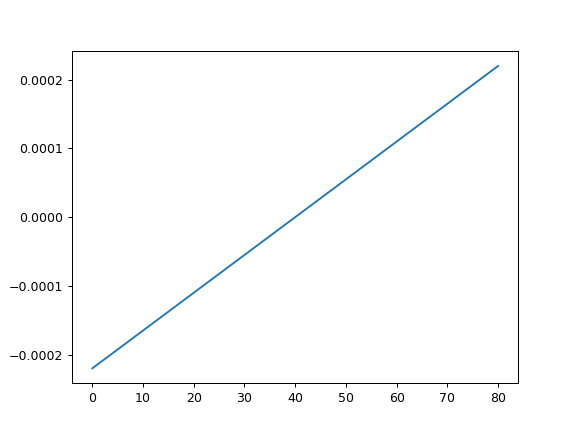

In [10]:
plt.figure()
plt.plot(range(81),(x[0]-x[1]))

In [244]:
A_S = simpson(XES['7a'], x[1].flat)
A_Li2S = simpson(XES['7c'], x[1].flat)

In [245]:
A_S, A_Li2S

(2.0295462204569645, 2.280667092720763)

In [246]:
XES['7c'] = XES['7c']*A_S/A_Li2S

A_S = simpson(XES['7a'], x[1].flat)
A_Li2S = simpson(XES['7c'], x[1].flat)

A_S, A_Li2S

(2.0295462204569645, 2.0295462204569645)

<IPython.core.display.Javascript object>


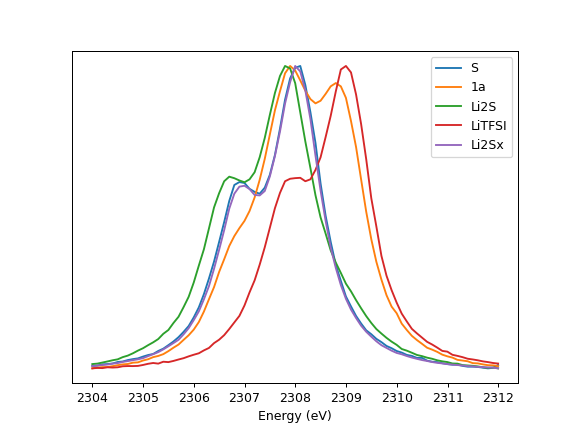

In [14]:
fig = plt.figure()
plt.plot(x[1], XES['7a'], label='S')
plt.plot(x[1], XES['1a'], label='1a')
plt.plot(x[1], XES['7c'], label='Li2S')
plt.plot(x[1], XES['7e'], label='LiTFSI')
#plt.plot(x[1], XES['3a'], label='3a')
plt.plot(x[0], XES['4a'], label='Li2Sx')
plt.yticks([])
plt.xlabel('Energy (eV)')
plt.legend()
#plt.savefig('s_reference XES')

In [15]:
alpha = list(np.linspace(0,2,1001))

In [16]:
alpha

[0.0,
 0.002,
 0.004,
 0.006,
 0.008,
 0.01,
 0.012,
 0.014,
 0.016,
 0.018000000000000002,
 0.02,
 0.022,
 0.024,
 0.026000000000000002,
 0.028,
 0.03,
 0.032,
 0.034,
 0.036000000000000004,
 0.038,
 0.04,
 0.042,
 0.044,
 0.046,
 0.048,
 0.05,
 0.052000000000000005,
 0.054,
 0.056,
 0.058,
 0.06,
 0.062,
 0.064,
 0.066,
 0.068,
 0.07,
 0.07200000000000001,
 0.074,
 0.076,
 0.078,
 0.08,
 0.082,
 0.084,
 0.08600000000000001,
 0.088,
 0.09,
 0.092,
 0.094,
 0.096,
 0.098,
 0.1,
 0.10200000000000001,
 0.10400000000000001,
 0.106,
 0.108,
 0.11,
 0.112,
 0.114,
 0.116,
 0.11800000000000001,
 0.12,
 0.122,
 0.124,
 0.126,
 0.128,
 0.13,
 0.132,
 0.134,
 0.136,
 0.138,
 0.14,
 0.14200000000000002,
 0.14400000000000002,
 0.146,
 0.148,
 0.15,
 0.152,
 0.154,
 0.156,
 0.158,
 0.16,
 0.162,
 0.164,
 0.166,
 0.168,
 0.17,
 0.17200000000000001,
 0.17400000000000002,
 0.176,
 0.178,
 0.18,
 0.182,
 0.184,
 0.186,
 0.188,
 0.19,
 0.192,
 0.194,
 0.196,
 0.198,
 0.2,
 0.202,
 0.20400000000000001,


<IPython.core.display.Javascript object>


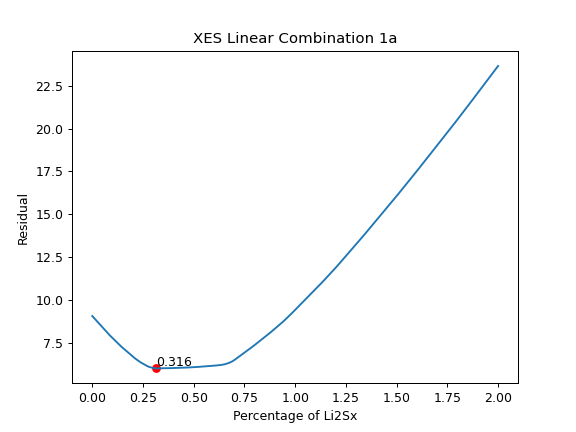

<IPython.core.display.Javascript object>


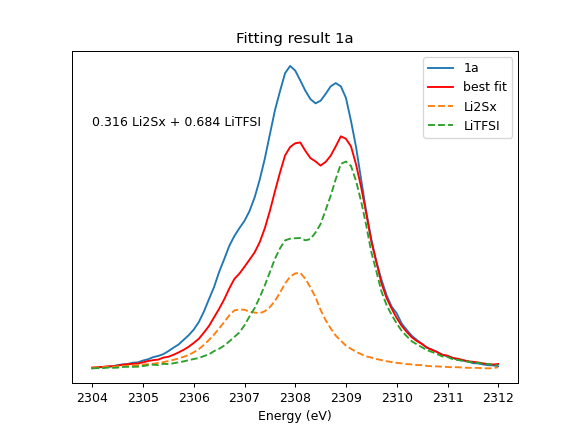

<IPython.core.display.Javascript object>


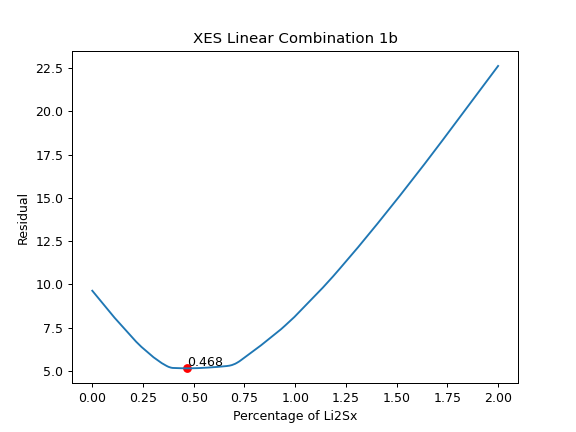

<IPython.core.display.Javascript object>


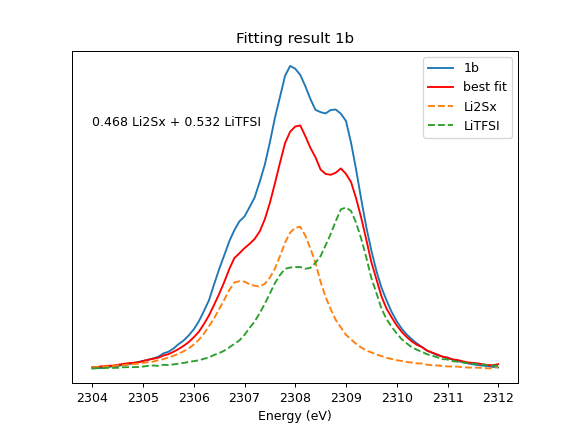

<IPython.core.display.Javascript object>


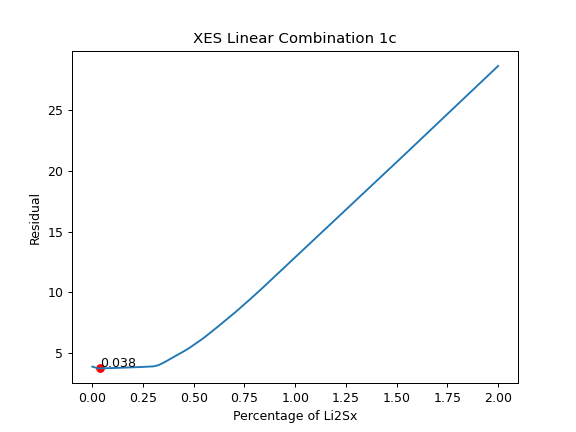

<IPython.core.display.Javascript object>


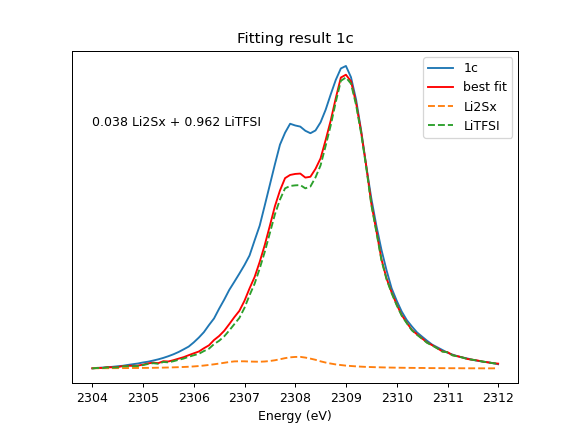

<IPython.core.display.Javascript object>


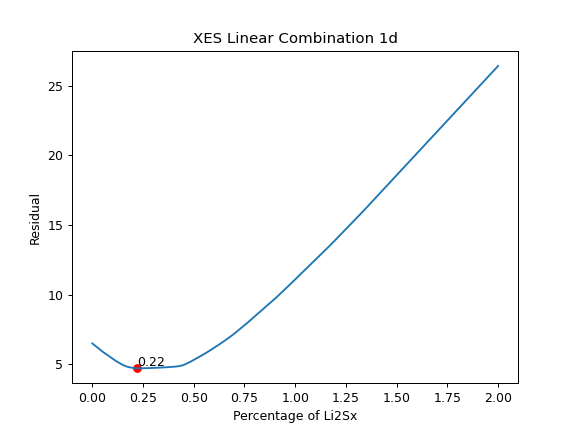

<IPython.core.display.Javascript object>


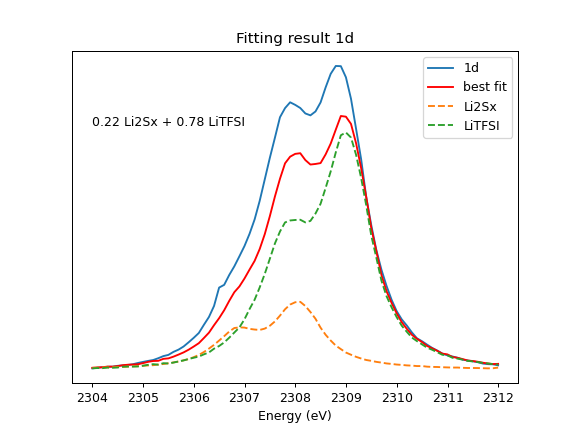

<IPython.core.display.Javascript object>


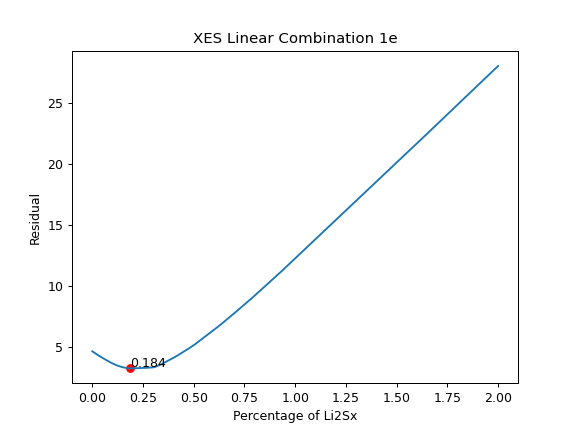

<IPython.core.display.Javascript object>


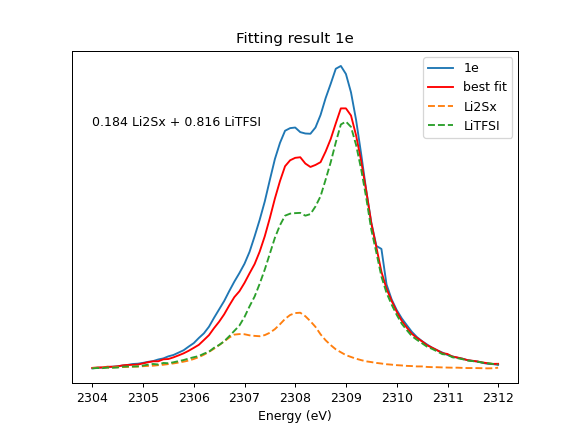

<IPython.core.display.Javascript object>


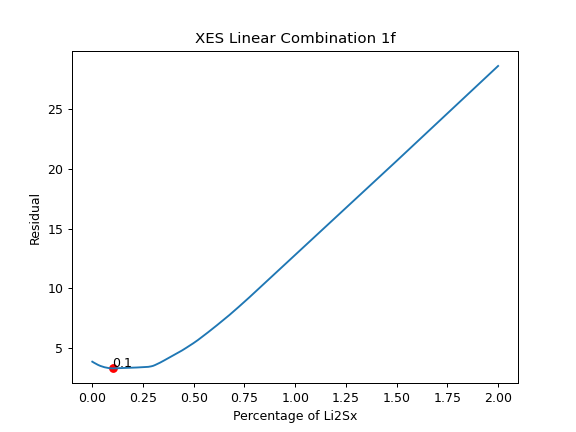

<IPython.core.display.Javascript object>


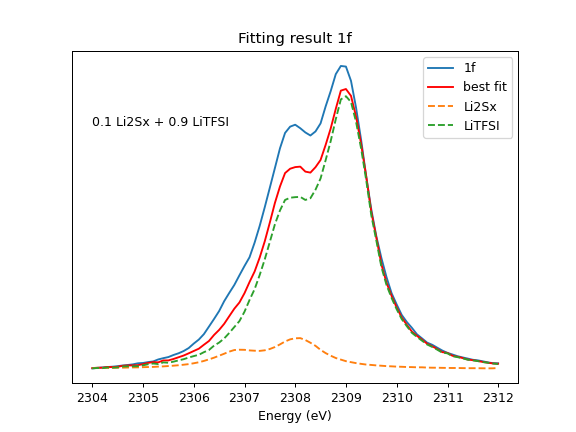

<IPython.core.display.Javascript object>


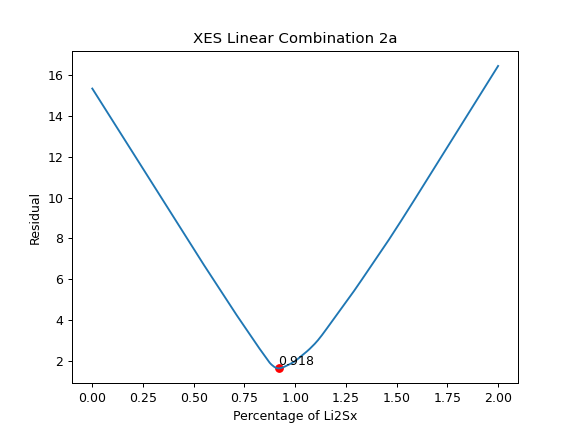

<IPython.core.display.Javascript object>


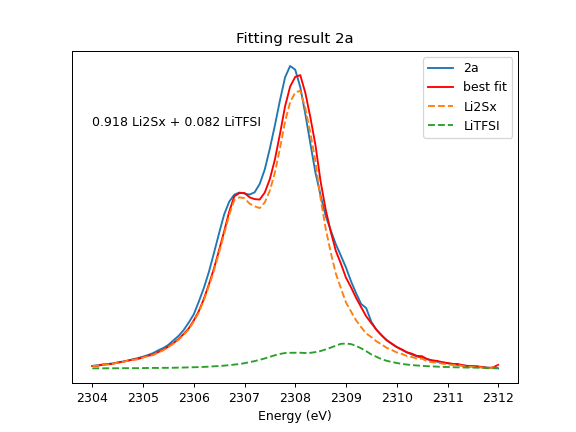

<IPython.core.display.Javascript object>


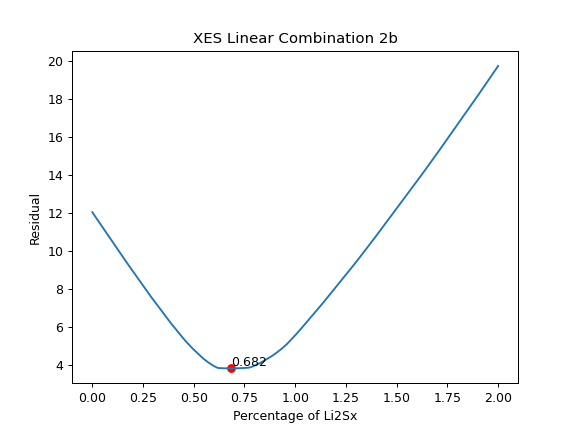

<IPython.core.display.Javascript object>


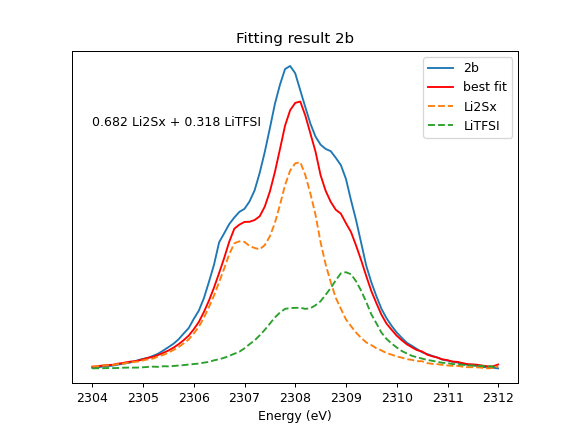

<IPython.core.display.Javascript object>


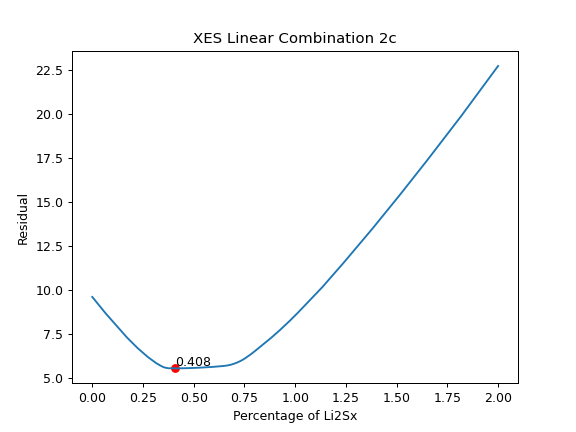

<IPython.core.display.Javascript object>


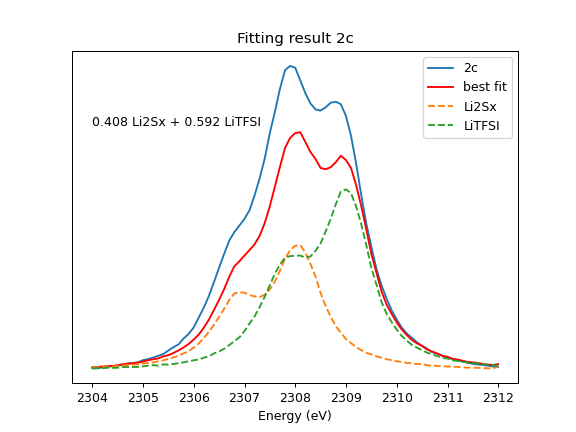

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_14260\3756586980.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


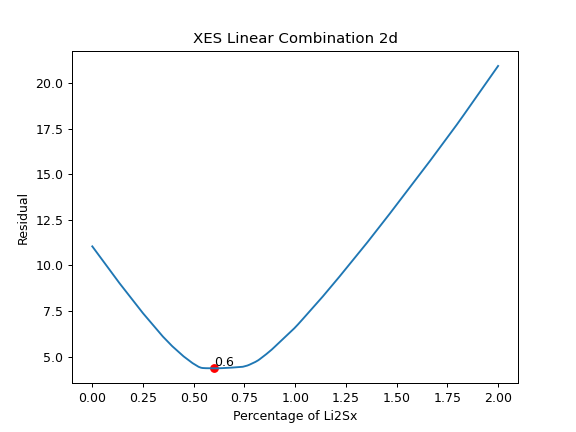

<IPython.core.display.Javascript object>


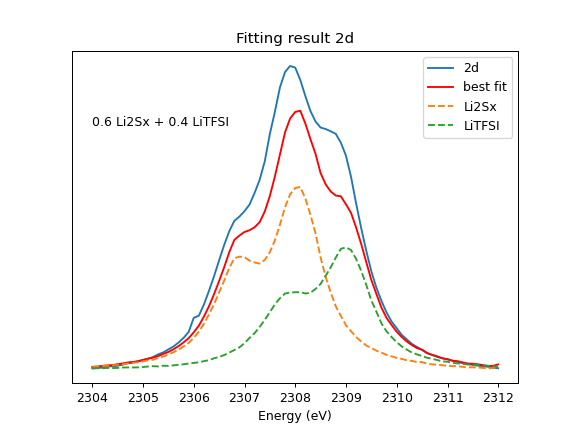

<IPython.core.display.Javascript object>


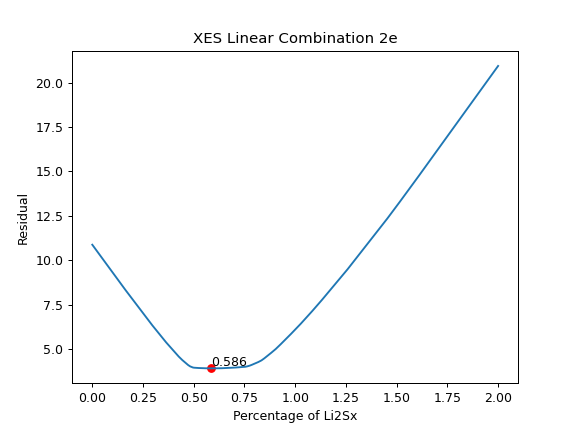

<IPython.core.display.Javascript object>


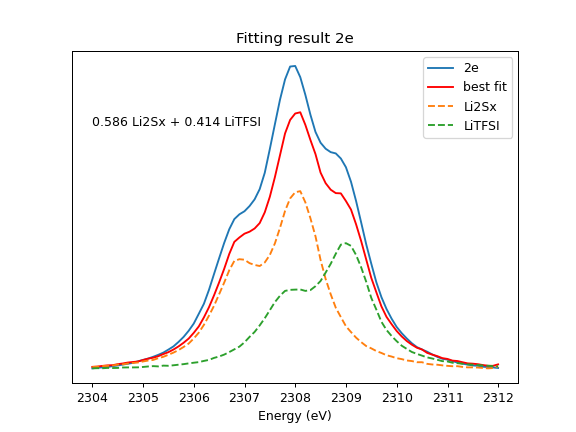

<IPython.core.display.Javascript object>


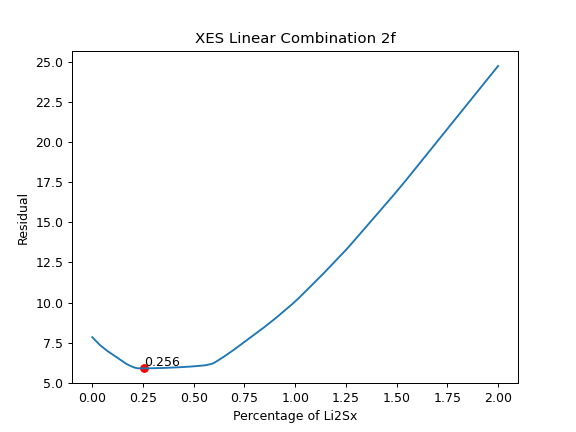

<IPython.core.display.Javascript object>


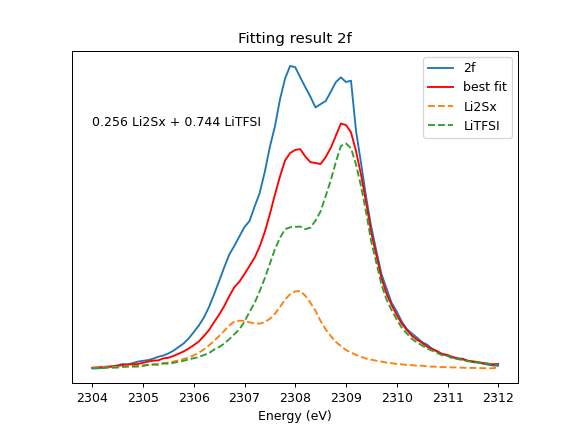

In [17]:
for j in XES.columns[:12]:
    diff = []
    for i in alpha:
        fit = i*XES['7a']+(1-i)*XES['7e']
        sample = XES[j]
        diff.append((fit-sample).abs().sum())
        
    best_alpha = alpha[diff.index(min(diff))]    
    plt.figure()
    plt.plot(alpha,diff)
    plt.scatter(best_alpha,min(diff), color='red')
    plt.text(best_alpha,min(diff)+0.15,'%s'%round(best_alpha,3))
    plt.xlabel('Percentage of Li2Sx')
    plt.ylabel('Residual')
    plt.title('XES Linear Combination '+j)
    #plt.savefig('LC'+j)
    
    plt.figure()
    plt.plot(x[0], XES[j], label=j)
    plt.plot(x[1], best_alpha*XES['7a']+(1-best_alpha)*XES['7e'], color='red', label='best fit')
    plt.plot(x[1], best_alpha*XES['7a'], '--', label="Li2Sx")
    plt.plot(x[1], (1-best_alpha)*XES['7e'], '--', label="LiTFSI")
    plt.text(2304,0.8, '%s Li2Sx + %s LiTFSI'%(round(best_alpha,3), round(1-best_alpha,3)))
    plt.xlabel('Energy (eV)')
    plt.yticks([])
    plt.title('Fitting result '+j)
    plt.legend()
    #plt.savefig('XES_LC'+j)

<IPython.core.display.Javascript object>


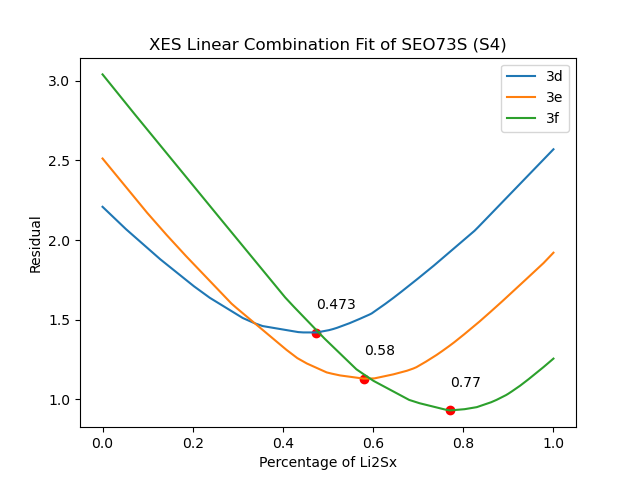

In [304]:
plt.figure()
for j in XES.columns[15:18]:    
   
    diff = []
    for i in alpha:
        fit = i*XES['7a']+(1-i)*XES['7c']
        sample = XES[j]
        diff.append((fit-sample).abs().sum())
        
    best_alpha = alpha[diff.index(min(diff))]    

    plt.plot(alpha,diff,label=j)
    plt.scatter(best_alpha,min(diff), color='red')
    plt.text(best_alpha,min(diff)+0.15,'%s'%round(best_alpha,3))
    plt.xlabel('Percentage of Li2Sx')
    plt.ylabel('Residual')
    plt.legend()
    plt.title('XES Linear Combination Fit of SEO73S (S4)')
    plt.savefig('LC_2')